In [54]:
import pandas as pd

df = pd.read_csv('../data/cubes.csv')
df

/tmp/ipykernel_4747/2770194504.py:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/cubes.csv')


,Unnamed: 0,Cube ID,Timestamp,Temperature Layer A,Temperature Layer B,Door,Humidity Layer A,Humidity Layer B
0,0,49,1451606401,NaN,NaN,0.0,NaN,NaN
1,1,95,1451606402,NaN,25.711899,NaN,NaN,NaN
2,2,48,1451606402,NaN,NaN,NaN,NaN,NaN
3,3,55,1451606402,NaN,NaN,NaN,NaN,8.594411
4,4,90,1451606403,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
400282,400282,37,1455929708,NaN,NaN,NaN,NaN,NaN
400283,400283,74,1455929721,NaN,NaN,NaN,NaN,NaN
400284,400284,6,1455929825,NaN,NaN,NaN,NaN,NaN
400285,400285,36,1455929967,NaN,NaN,NaN,NaN,NaN


In [55]:
df = df.drop(columns=['Unnamed: 0','Door']) # exclude index and unnecessary columns

df['Timestamp'] = df['Timestamp'] - df['Timestamp'].min() # move the timer to the start

df['Temperature Layer A'] = df['Temperature Layer A'].str.replace('°C', '').astype(float).round(2)
df['Temperature Layer B'] = df['Temperature Layer B'].str.replace('°C', '').astype(float).round(2)
# cast data to type numeric and round to 2 decimal places

df['Humidity Layer A'] = df['Humidity Layer A'].round(2)
df['Humidity Layer B'] = df['Humidity Layer B'].round(2)
# round to 2 decimal places

df = df.dropna(how='all', subset=[
    'Temperature Layer A',
    'Temperature Layer B',
    'Humidity Layer A',
    'Humidity Layer B'
    ])
# clear data from empty rows

df

,Cube ID,Timestamp,Temperature Layer A,Temperature Layer B,Humidity Layer A,Humidity Layer B
3,55,1,NaN,NaN,NaN,8.59
9,99,9,NaN,NaN,NaN,9.35
10,75,10,NaN,NaN,10.64,NaN
15,9,16,NaN,NaN,NaN,11.06
18,7,20,NaN,NaN,9.89,NaN
...,...,...,...,...,...,...
400175,6,4316871,16.78,NaN,NaN,NaN
400176,92,4316880,20.49,NaN,NaN,NaN
400177,35,4316882,19.23,NaN,NaN,NaN
400178,98,4316884,17.53,NaN,NaN,NaN


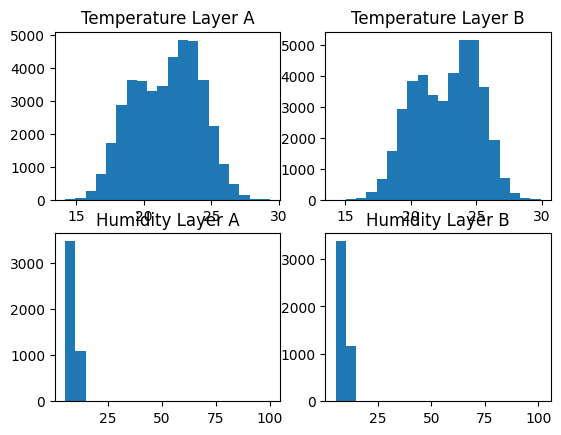

In [56]:
import matplotlib.pyplot as plt

bins = 20

fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['Temperature Layer A'].values, bins=bins)
axs[0, 0].set_title('Temperature Layer A')

axs[0, 1].hist(df['Temperature Layer B'].values, bins=bins)
axs[0, 1].set_title('Temperature Layer B')

axs[1, 0].hist(df['Humidity Layer A'].values, bins=bins)
axs[1, 0].set_title('Humidity Layer A')

axs[1, 1].hist(df['Humidity Layer B'].values, bins=bins)
axs[1, 1].set_title('Humidity Layer B')

plt.show()

In [57]:
import numpy as np

df['Humidity Layer A'] = [x if x < 25 else np.nan for x in df['Humidity Layer A']]
df['Humidity Layer B'] = [x if x < 25 else np.nan for x in df['Humidity Layer B']]
# clear humidity from outliers

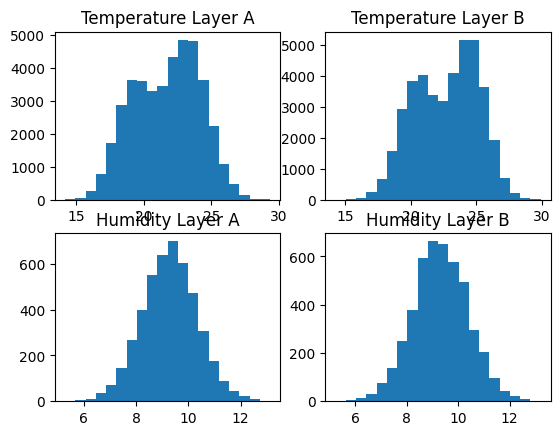

In [58]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['Temperature Layer A'].values, bins=bins)
axs[0, 0].set_title('Temperature Layer A')

axs[0, 1].hist(df['Temperature Layer B'].values, bins=bins)
axs[0, 1].set_title('Temperature Layer B')

axs[1, 0].hist(df['Humidity Layer A'].values, bins=bins)
axs[1, 0].set_title('Humidity Layer A')

axs[1, 1].hist(df['Humidity Layer B'].values, bins=bins)
axs[1, 1].set_title('Humidity Layer B')

plt.show()

In [59]:
df.to_csv('../data/cubes_processed.csv', index=False) # save data, disable indexing